In [1]:
%matplotlib inline
import numpy as np
import skimage.external.tifffile
import os
import matplotlib.pyplot as plt
from PIL import Image

import multiprocessing  
from multiprocessing import Pool

import pylattice as pyl
import pylattice.functions.TiffProcessing as tifproc

import sys
sys.path.append('/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/pylattice/functions')
import ParallelFunctions
from pprint import pprint
import time

In [2]:
#truthFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/dmask_01_cropped_96x480x672.tif"
truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample5_pos2_o1/dmask_001_croppedToFitPrediction.tif"
#predictionFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/3prediction.tif"
predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample5_pos2_o1/sample5_prediction.tif"


In [3]:
truth = ParallelFunctions.open3dTiff(truthFile)
prediction = ParallelFunctions.open3dTiff(predictionFile)

GroundTruth


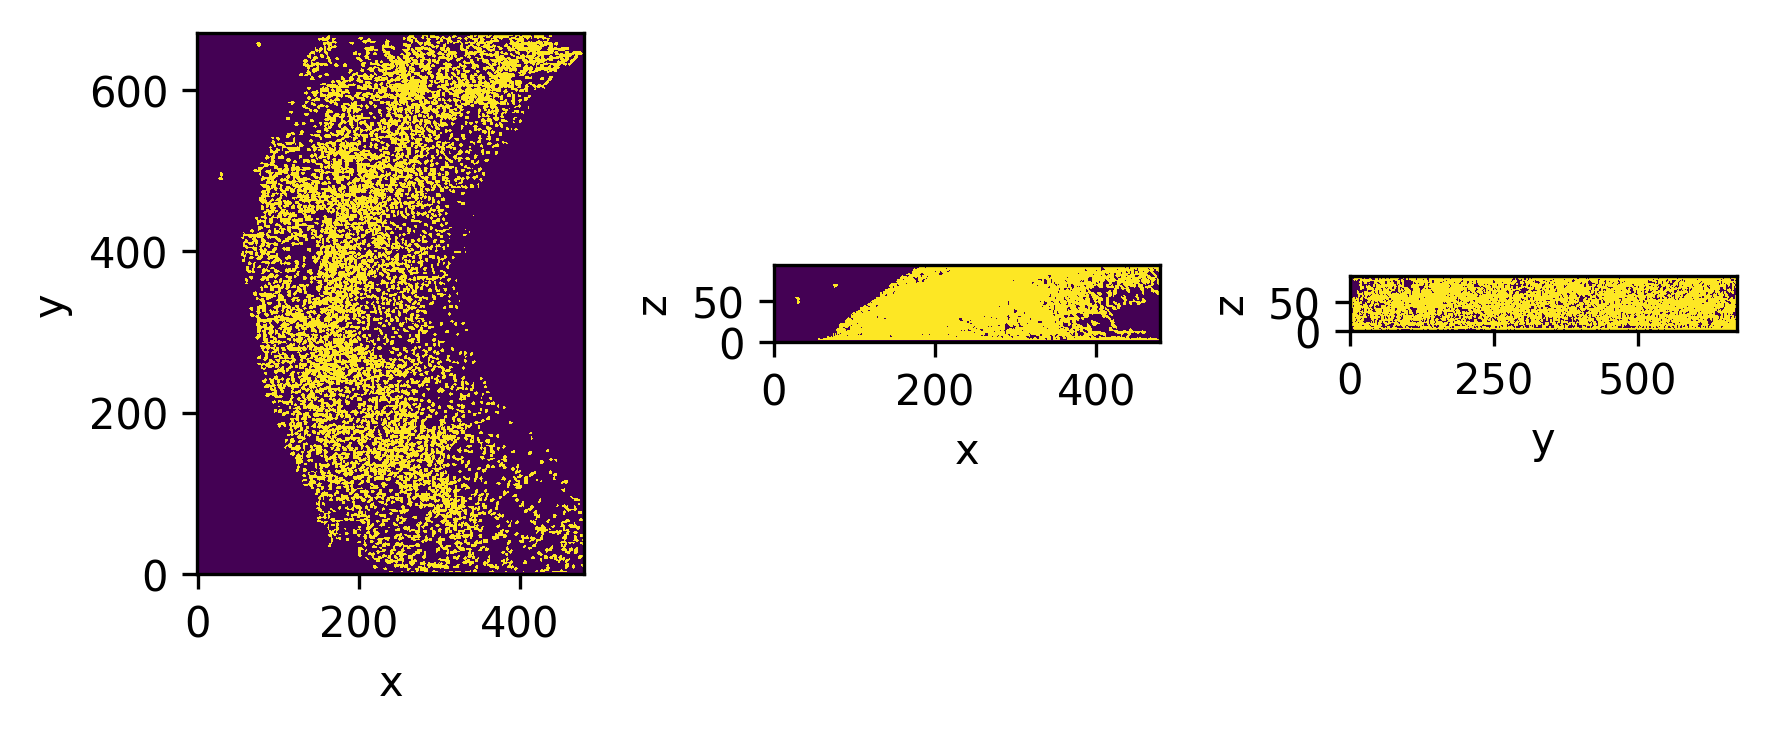

Prediction


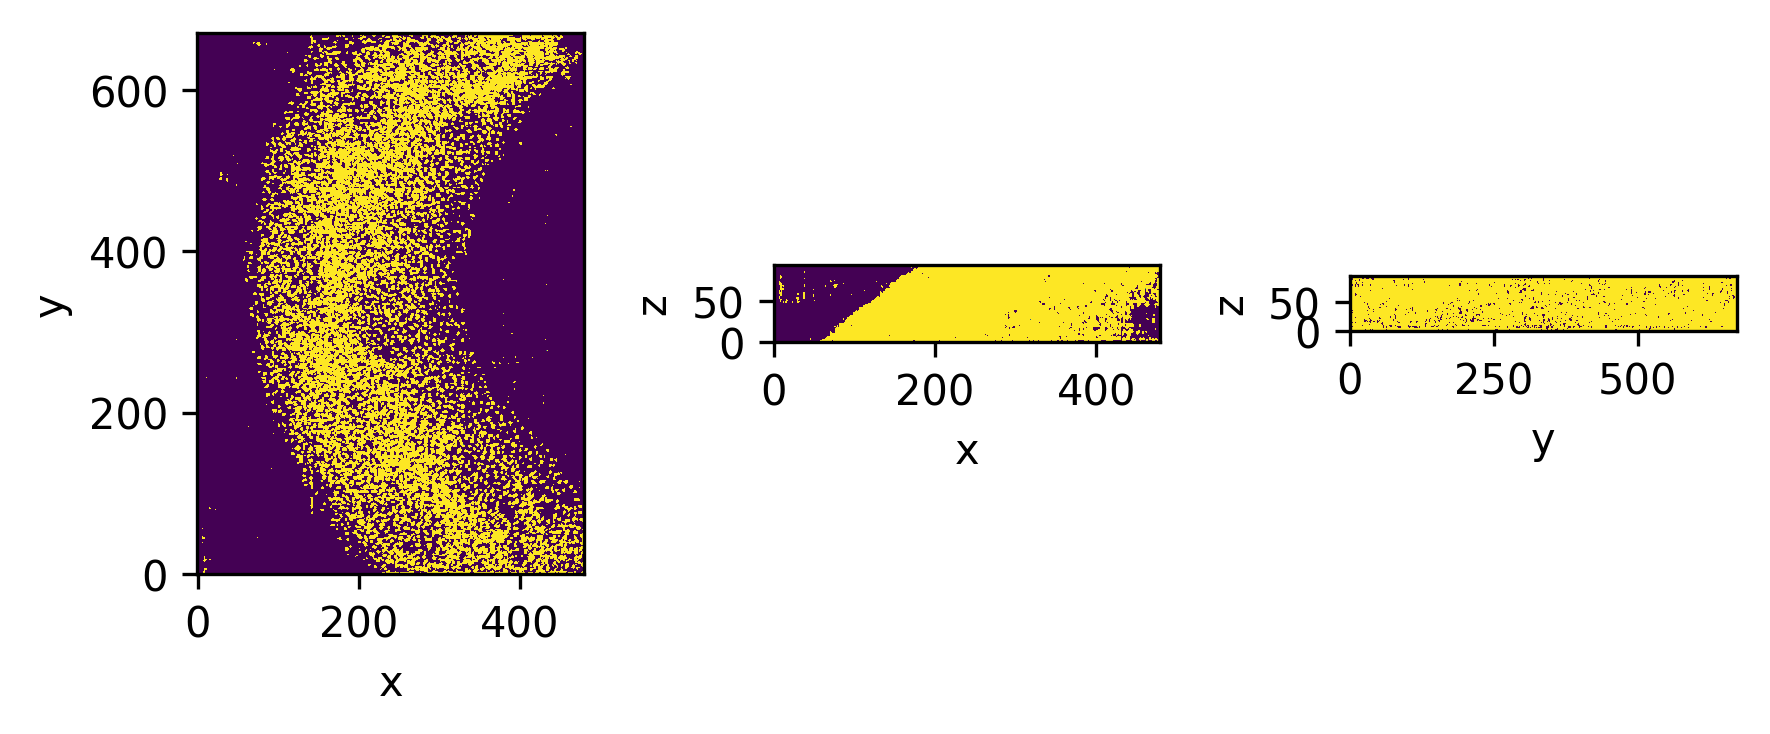

In [4]:
print('GroundTruth')
tifproc.maxIntensityProjection(truth)
print('Prediction')
tifproc.maxIntensityProjection(prediction)

# label all connected components in the mask

In [5]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(truth)
print(nb_labels)

4892


In [6]:
import skimage
import os

multiplierForOutput = 1
outputPath_tiff = "./truth_components_labeled.tiff"
skimage.external.tifffile.imsave(outputPath_tiff, (label_im*multiplierForOutput).astype('uint16'))    
print(os.path.abspath(outputPath_tiff))


/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/truth_components_labeled.tiff


In [7]:
ndimage.find_objects(label_im==4)[0]

(slice(2, 5, None), slice(11, 16, None), slice(277, 284, None))

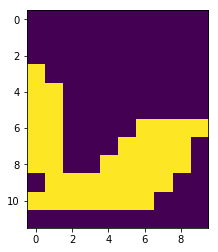

In [8]:
slice_z, slice_x, slice_y  = ndimage.find_objects(label_im==7)[0]
roi = truth[slice_z, slice_x, slice_y]
plt.imshow(roi[0])     

In [9]:
ndimage.measurements.center_of_mass(truth)

(46.76272978421564, 359.99642201149857, 241.25769581124467)

In [10]:
label_im, nb_labels = ndimage.label(truth)
truth_allCentersOfMass = ndimage.measurements.center_of_mass(truth, label_im,range(1,nb_labels+1) )
pprint(truth_allCentersOfMass)

[(3.8358208955223883, 8.164179104477611, 220.2089552238806),
 (5.452459016393442, 14.052459016393442, 251.58688524590164),
 (3.4966442953020134, 10.63758389261745, 292.2684563758389),
 (2.5714285714285716, 12.89795918367347, 279.83673469387753),
 (2.9473684210526314, 22.657894736842106, 201.6315789473684),
 (2.5142857142857142, 28.685714285714287, 276.0857142857143),
 (2.5714285714285716, 32.26190476190476, 258.07142857142856),
 (2.715909090909091, 46.86931818181818, 166.51136363636363),
 (2.392857142857143, 43.535714285714285, 175.75),
 (3.2058823529411766, 45.81372549019608, 265.11764705882354),
 (3.0823529411764707, 78.17058823529412, 154.86176470588236),
 (4.653333333333333, 100.72, 148.16),
 (3.25, 109.33823529411765, 151.7941176470588),
 (3.261455525606469, 114.87870619946092, 144.02695417789758),
 (2.2083333333333335, 115.66666666666667, 131.875),
 (2.4444444444444446, 121.51851851851852, 132.62962962962962),
 (2.8465608465608465, 139.3015873015873, 125.37037037037037),
 (2.9230

 (12.39622641509434, 264.0566037735849, 171.20754716981133),
 (11.11111111111111, 270.1111111111111, 154.11111111111111),
 (11.88888888888889, 289.2962962962963, 170.66666666666666),
 (11.702702702702704, 300.5945945945946, 113.35135135135135),
 (11.555555555555555, 315.3333333333333, 161.64444444444445),
 (12.297872340425531, 325.72340425531917, 158.12765957446808),
 (12.05952380952381, 328.3690476190476, 106.53571428571429),
 (12.270833333333334, 343.0, 91.16666666666667),
 (13.214285714285714, 353.62857142857143, 79.71428571428571),
 (14.634146341463415, 367.4756097560976, 82.76829268292683),
 (11.979591836734693, 388.42857142857144, 159.28571428571428),
 (11.634920634920634, 400.6031746031746, 82.9047619047619),
 (14.469565217391304, 402.45217391304345, 167.0782608695652),
 (13.057142857142857, 418.57142857142856, 152.77142857142857),
 (12.38, 424.48, 177.38),
 (11.461538461538462, 426.61538461538464, 113.46153846153847),
 (13.833333333333334, 443.5, 134.38095238095238),
 (12.12, 4

 (44.55555555555556, 541.2870370370371, 298.3888888888889),
 (40.0, 555.0, 283.5),
 (41.60377358490566, 572.3396226415094, 165.81132075471697),
 (41.785714285714285, 583.8928571428571, 291.69642857142856),
 (42.0, 589.5084745762712, 351.45762711864404),
 (40.0, 590.4545454545455, 259.90909090909093),
 (47.1484375, 614.7421875, 366.9140625),
 (42.1796875, 617.81640625, 203.578125),
 (40.84615384615385, 636.4615384615385, 202.73076923076923),
 (43.00714285714286, 654.2142857142857, 417.90714285714284),
 (42.24175824175824, 666.2857142857143, 361.45054945054943),
 (44.50909090909091, 666.4090909090909, 371.8545454545455),
 (43.80701754385965, 23.54385964912281, 383.6140350877193),
 (42.421052631578945, 34.766917293233085, 270.50375939849624),
 (42.2875, 54.3875, 248.575),
 (41.82692307692308, 86.46153846153847, 317.25),
 (51.33870967741935, 85.81854838709677, 311.60483870967744),
 (43.38383838383838, 91.32323232323232, 295.92929292929296),
 (43.22857142857143, 91.88571428571429, 284.4),
 

 (68.96153846153847, 396.0, 200.57692307692307),
 (74.00628930817611, 392.55974842767296, 170.125786163522),
 (68.90625, 410.0, 221.84375),
 (69.32142857142857, 412.2142857142857, 183.125),
 (69.24, 445.6, 211.06),
 (68.42857142857143, 466.76190476190476, 282.5952380952381),
 (68.9375, 475.765625, 285.421875),
 (69.07407407407408, 493.75925925925924, 244.59259259259258),
 (76.64, 505.33142857142855, 238.66285714285715),
 (69.0, 554.578125, 344.40625),
 (72.20212765957447, 597.0425531914893, 269.2659574468085),
 (70.84615384615384, 602.4358974358975, 391.1666666666667),
 (69.88888888888889, 619.4444444444445, 404.28395061728395),
 (69.484375, 626.875, 405.515625),
 (69.22413793103448, 657.6379310344828, 276.44827586206895),
 (70.3076923076923, 58.46153846153846, 441.2769230769231),
 (71.47058823529412, 76.55882352941177, 314.70588235294116),
 (69.94949494949495, 84.81818181818181, 288.75757575757575),
 (69.44444444444444, 130.17460317460316, 267.63492063492066),
 (73.49664429530202, 151

In [11]:
label_im, nb_labels = ndimage.label(prediction)
prediction_allCentersOfMass = ndimage.measurements.center_of_mass(prediction, label_im,range(1,nb_labels+1) )
pprint(prediction_allCentersOfMass)

[(1.8, 2.675, 307.0),
 (3.33515559293524, 23.163582842724978, 251.4121110176619),
 (0.3333333333333333, 24.0, 186.33333333333334),
 (1.6567164179104477, 28.671641791044777, 276.5820895522388),
 (1.169811320754717, 30.58490566037736, 184.69811320754718),
 (1.375, 40.95, 259.225),
 (1.3461538461538463, 43.23076923076923, 176.75),
 (2.0, 45.96551724137931, 262.62068965517244),
 (2.5851063829787235, 48.829787234042556, 255.70212765957447),
 (2.2830188679245285, 58.528301886792455, 249.9811320754717),
 (1.68, 60.64, 179.2),
 (2.533333333333333, 78.76666666666667, 219.7),
 (1.4958921424057299, 87.68927743838213, 142.13882452074995),
 (2.119047619047619, 87.11904761904762, 200.16666666666666),
 (2.265625, 96.328125, 213.6875),
 (2.2070457772668877, 102.3102981946041, 220.482656028129),
 (1.5, 110.0, 134.42307692307693),
 (2.3518518518518516, 109.75925925925925, 216.22222222222223),
 (1.300084972874044, 115.78318844368913, 132.59990849075103),
 (1.8548387096774193, 117.48387096774194, 183.3387

 (3.0, 139.0, 148.0),
 (4.333333333333333, 138.77777777777777, 227.77777777777777),
 (4.72, 141.4, 206.72),
 (8.183098591549296, 158.81690140845072, 133.21596244131456),
 (6.711656441717792, 159.98773006134968, 172.61349693251535),
 (3.5, 163.0, 164.5),
 (4.695652173913044, 165.58695652173913, 117.45652173913044),
 (3.8333333333333335, 163.58333333333334, 181.25),
 (5.579067828185157, 168.53801252594786, 191.0912478044107),
 (5.153846153846154, 169.92307692307693, 125.97435897435898),
 (3.986666666666667, 176.06666666666666, 172.76),
 (3.0, 175.0, 108.0),
 (4.3088235294117645, 180.73529411764707, 183.35294117647058),
 (4.088888888888889, 184.2888888888889, 115.77777777777777),
 (5.254237288135593, 183.23728813559322, 164.16949152542372),
 (5.362068965517241, 184.0, 107.89655172413794),
 (6.268041237113402, 191.28865979381445, 116.89690721649484),
 (3.5, 190.0, 94.0),
 (5.369565217391305, 195.82608695652175, 178.7608695652174),
 (4.75, 201.175, 102.5),
 (4.25, 203.96875, 151.52083333333

 (20.88888888888889, 564.4444444444445, 131.11111111111111),
 (22.314285714285713, 565.7714285714286, 290.72857142857146),
 (22.423076923076923, 567.7692307692307, 173.87179487179486),
 (20.0, 566.0, 328.0),
 (22.935064935064936, 573.8441558441558, 146.54545454545453),
 (21.903225806451612, 583.516129032258, 284.38709677419354),
 (23.043956043956044, 590.3626373626373, 295.2637362637363),
 (21.00056053811659, 596.5717488789238, 308.2853139013453),
 (23.2, 595.35, 153.33333333333334),
 (24.668478260869566, 614.7608695652174, 178.2663043478261),
 (22.095507094062008, 613.4739884393064, 379.7940094587493),
 (22.916666666666668, 619.8020833333334, 390.4375),
 (21.38095238095238, 617.7619047619048, 245.52380952380952),
 (20.25, 624.75, 203.25),
 (22.770114942528735, 630.4252873563219, 198.32183908045977),
 (21.785714285714285, 631.4285714285714, 358.64285714285717),
 (25.574822919430893, 636.9247586192819, 342.2110473779828),
 (21.761904761904763, 635.1904761904761, 258.8095238095238),
 (22

 (42.3625, 220.775, 230.9375),
 (42.5735294117647, 233.7058823529412, 149.88235294117646),
 (42.083333333333336, 246.875, 187.95833333333334),
 (41.1, 259.2, 169.8),
 (42.285714285714285, 263.98214285714283, 195.17857142857142),
 (40.9, 266.2, 171.6),
 (40.5, 273.5, 120.5),
 (46.532786885245905, 285.3360655737705, 174.55737704918033),
 (43.310344827586206, 297.67241379310343, 118.65517241379311),
 (51.160714285714285, 308.15816326530614, 143.7576530612245),
 (43.6271186440678, 320.45762711864404, 195.25423728813558),
 (42.317460317460316, 330.5079365079365, 184.5873015873016),
 (41.6875, 336.375, 184.3125),
 (42.25757575757576, 350.75757575757575, 167.71212121212122),
 (41.6985294117647, 358.08088235294116, 111.69117647058823),
 (42.472727272727276, 353.4, 158.83636363636364),
 (41.43589743589744, 364.3333333333333, 209.69230769230768),
 (40.5, 369.0, 139.0),
 (43.25714285714286, 414.37142857142857, 124.15714285714286),
 (43.641891891891895, 431.1081081081081, 220.34459459459458),
 (42

 (57.75675675675676, 397.3783783783784, 193.35135135135135),
 (58.56521739130435, 417.5507246376812, 224.46376811594203),
 (56.89473684210526, 422.7894736842105, 158.94736842105263),
 (58.29032258064516, 422.4032258064516, 241.43548387096774),
 (59.969565217391306, 431.45217391304345, 246.55652173913043),
 (56.0, 433.50295857988164, 0.0),
 (62.60689655172414, 447.5103448275862, 230.93793103448274),
 (64.92, 446.26666666666665, 209.78),
 (58.925, 451.8, 196.875),
 (58.73134328358209, 457.3731343283582, 185.76119402985074),
 (58.529411764705884, 459.45588235294116, 258.05882352941177),
 (59.5974025974026, 475.14285714285717, 165.87012987012986),
 (58.2, 478.6, 185.3),
 (56.0, 481.5, 48.0),
 (57.3, 487.3, 233.6),
 (58.23684210526316, 493.9342105263158, 169.78947368421052),
 (58.55813953488372, 496.74418604651163, 188.41860465116278),
 (58.41025641025641, 501.77777777777777, 262.0769230769231),
 (58.753846153846155, 502.6, 283.0153846153846),
 (59.08403361344538, 514.2436974789916, 291.689

 (75.4870273531778, 41.10257441673371, 461.7694086886565),
 (78.5586646837821, 46.518941765810894, 351.07780212899183),
 (76.56626506024097, 60.06024096385542, 311.7710843373494),
 (79.14844411515665, 57.83530906011855, 328.47507408975446),
 (79.12328767123287, 63.705479452054796, 417.73972602739724),
 (73.0, 69.0, 330.0),
 (74.0, 72.33304309969526, 366.88985633434913),
 (77.0, 76.9054054054054, 320.4054054054054),
 (77.26415094339623, 77.55660377358491, 407.5377358490566),
 (75.02222222222223, 85.66666666666667, 309.4),
 (75.83333333333333, 90.97435897435898, 396.62820512820514),
 (75.72727272727273, 92.62121212121212, 428.07575757575756),
 (76.3610629957152, 105.01089433859057, 414.12822499772085),
 (77.11661655118316, 111.63322002876193, 417.6167472872271),
 (75.50909090909092, 117.11818181818182, 278.57272727272726),
 (74.07692307692308, 121.53846153846153, 390.9230769230769),
 (78.96027801506563, 124.1583443348606, 261.4554244000932),
 (73.0, 129.0, 222.0),
 (75.15517241379311, 13

 (92.95698924731182, 426.2795698924731, 260.7956989247312),
 (92.18499969830447, 427.9539612622941, 228.6308453508719),
 (91.52112676056338, 439.49295774647885, 305.4366197183099),
 (91.66129032258064, 443.43548387096774, 210.5483870967742),
 (91.98130841121495, 446.8224299065421, 300.5140186915888),
 (89.0, 446.0, 317.0),
 (92.82758620689656, 473.35632183908046, 277.0919540229885),
 (91.06666666666666, 478.5, 323.73333333333335),
 (92.08333333333333, 483.2916666666667, 307.75),
 (92.27272727272727, 490.9818181818182, 293.4),
 (92.16981132075472, 497.58490566037733, 261.188679245283),
 (92.5, 495.45, 355.075),
 (90.0, 495.6, 271.6),
 (92.16320964616378, 500.1215100839733, 329.1347161415345),
 (89.25, 503.5, 236.75),
 (92.51724137931035, 502.8965517241379, 336.0),
 (92.63636363636364, 521.9727272727273, 231.48181818181817),
 (90.93333333333334, 524.3333333333334, 238.6),
 (89.33333333333333, 532.6666666666666, 278.0),
 (90.875, 537.7, 353.375),
 (91.36764705882354, 547.3970588235294, 35

In [12]:
# find the closest match between points
# if that distance is below threshold: match -> remove both locations, put predicted location into TP
# if that distance is above threshold: no-match found -> put the predicted location into FP
# end 1: put remaining locations in truth into FN (false negative, i.e. there is something but we predicted nothing)
# end 2: put the remaining locations in prediction into FP 

In [21]:
start_time = time.time()

prediction_truth_matches = []
distanceThreshold = 5

i = 0
truth_allCentersOfMass_available_for_match = truth_allCentersOfMass
for predictionCOM in prediction_allCentersOfMass:
    # got throuth the array and find the closest center of mass (COM) to that prediction
    closestDistance = 10000
    closestTruthCOM = []
    for truthCOM in truth_allCentersOfMass_available_for_match:
        if(False):
            print("pred {}".format(predictionCOM))
            print(truthCOM)
            print("dist {}".format(dist))
        dist = np.linalg.norm(np.array(predictionCOM)-np.array(truthCOM))
        if(dist < closestDistance):
            closestDistance = dist
            closestTruthCOM = truthCOM
    # in the end, check if that closest found COM is a shorter distance away than your threshold
    if(closestDistance < distanceThreshold):
        if(False):
            print([predictionCOM,closestTruthCOM,closestDistance])
        prediction_truth_matches.append([predictionCOM,closestTruthCOM,closestDistance])
        # remove the location to prevent double counting
        itemindex = np.where(truth_allCentersOfMass_available_for_match==closestTruthCOM)
        np.delete(truth_allCentersOfMass_available_for_match, itemindex)
    #else:
        #prediction_truth_matches.append([predictionCOM,None,None])
    i = i+1
    if(i%100 == 0):
        print(i)

elapsed_time = time.time() - start_time
print("elapsed time: {}".format(elapsed_time))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
elapsed time: 261.94731521606445


In [22]:
pprint(prediction_truth_matches)
print(len(prediction_truth_matches))

[[(1.6567164179104477, 28.671641791044777, 276.5820895522388),
  (2.5142857142857142, 28.685714285714287, 276.0857142857143),
  0.9909649531689227],
 [(1.3461538461538463, 43.23076923076923, 176.75),
  (2.392857142857143, 43.535714285714285, 175.75),
  1.4793847632935082],
 [(2.0, 45.96551724137931, 262.62068965517244),
  (3.2058823529411766, 45.81372549019608, 265.11764705882354),
  2.7770468596172875],
 [(2.2830188679245285, 58.528301886792455, 249.9811320754717),
  (4.0, 58.8, 248.6),
  2.2202184312631186],
 [(2.265625, 96.328125, 213.6875), (4.0, 97.64, 209.4), 4.8074659547676415],
 [(2.2070457772668877, 102.3102981946041, 220.482656028129),
  (4.0, 102.0, 220.0),
  1.8825319800418636],
 [(1.300084972874044, 115.78318844368913, 132.59990849075103),
  (2.2083333333333335, 115.66666666666667, 131.875),
  1.1678975677517272],
 [(2.8333333333333335, 117.1, 164.96666666666667),
  (4.0, 116.81818181818181, 164.8181818181818),
  1.2093718819883266],
 [(1.5116279069767442, 121.302325581395

  0.29659782209239843],
 [(3.2325581395348837, 293.06976744186045, 157.02325581395348),
  (4.0, 293.26666666666665, 157.06666666666666),
  0.7934864939346654],
 [(2.353022611905861, 298.17651130595294, 99.05906783571758),
  (2.659090909090909, 299.47727272727275, 98.45454545454545),
  1.466664715288978],
 [(3.611764705882353, 301.70588235294116, 160.38823529411764),
  (3.8867924528301887, 302.3207547169811, 161.20754716981133),
  1.0606508545718663],
 [(3.0217391304347827, 316.9782608695652, 160.7173913043478),
  (3.1914893617021276, 316.9148936170213, 160.82978723404256),
  0.21322146871791875],
 [(3.2962962962962963, 328.3333333333333, 67.16666666666667),
  (3.327272727272727, 328.2909090909091, 67.12727272727273),
  0.06566001890251867],
 [(5.604651162790698, 335.33720930232556, 89.36627906976744),
  (5.90625, 335.109375, 88.859375),
  0.6323148455231588],
 [(5.26509499269287, 336.6475655718791, 157.35641489116222),
  (5.131782945736434, 336.73643410852713, 157.1860465116279),
  0.2

 [(4.818473609129814, 481.09058487874466, 137.18152639087018),
  (4.175, 480.675, 137.9),
  1.0502254063313272],
 [(6.019047619047619, 517.0952380952381, 192.95238095238096),
  (5.872093023255814, 517.0116279069767, 193.01162790697674),
  0.17915501230583106],
 [(7.070422535211268, 529.4225352112676, 214.61971830985917),
  (7.215686274509804, 529.4901960784314, 214.54901960784315),
  0.17515094452243],
 [(12.436162056967625, 537.2858111694286, 120.09022822433214),
  (13.3875, 537.825, 120.0125),
  1.0962710220214256],
 [(6.728395061728395, 564.1728395061729, 111.64197530864197),
  (6.666666666666667, 564.25, 111.76666666666667),
  0.1590976785832717],
 [(5.636363636363637, 571.6233766233767, 265.68831168831167),
  (6.146341463414634, 570.560975609756, 265.3414634146341),
  1.2284449612330484],
 [(9.722772277227723, 581.6633663366337, 287.9257425742574),
  (12.571428571428571, 579.2380952380952, 289.3333333333333),
  3.9972608532508858],
 [(4.923076923076923, 612.5384615384615, 376.1538

 [(15.127659574468085, 601.7659574468086, 138.04255319148936),
  (15.0625, 601.7708333333334, 138.1875),
  0.15899409332325717],
 [(15.39047619047619, 611.3809523809524, 272.0095238095238),
  (15.654320987654321, 611.1604938271605, 272.1975308641975),
  0.39187077403791787],
 [(15.21951219512195, 617.1951219512196, 374.2682926829268),
  (14.627272727272727, 615.3818181818182, 377.2090909090909),
  3.5052977554572147],
 [(14.989690721649485, 619.1134020618557, 274.2474226804124),
  (15.096774193548388, 619.241935483871, 274.2096774193548),
  0.1715004818103513],
 [(14.501618445296549, 638.4063542652258, 173.06030576166526),
  (14.62962962962963, 638.3888888888889, 173.05555555555554),
  0.12928444277263781],
 [(15.5625, 642.33125, 260.8),
  (15.705882352941176, 642.2254901960785, 260.72549019607845),
  0.19312003039791387],
 [(14.677685950413224, 662.2396694214876, 262.43801652892563),
  (14.777777777777779, 662.1527777777778, 262.47222222222223),
  0.13688886406741962],
 [(17.688947471

 [(23.307692307692307, 5.826923076923077, 262.09615384615387),
  (23.25, 5.795454545454546, 262.15909090909093),
  0.0909931026550585],
 [(23.550847457627118, 16.720338983050848, 250.10169491525423),
  (23.537634408602152, 16.86021505376344, 249.95698924731184),
  0.2016919189188882],
 [(26.751824817518248, 35.693430656934304, 343.3430656934307),
  (27.63302752293578, 35.559633027522935, 343.04587155963304),
  0.9395447657429662],
 [(27.793478260869566, 52.391304347826086, 221.05978260869566),
  (28.182481751824817, 52.08029197080292, 221.23357664233578),
  0.5275005030953774],
 [(23.535353535353536, 65.51515151515152, 202.6969696969697),
  (23.95, 66.15, 203.0),
  0.8165731160850671],
 [(23.4375, 81.375, 201.84375),
  (23.428571428571427, 81.34693877551021, 201.6530612244898),
  0.1929491145696319],
 [(24.44578313253012, 103.3855421686747, 186.86746987951807),
  (24.62, 103.42, 186.7),
  0.24410042932461393],
 [(25.888235294117646, 106.41176470588235, 264.86470588235295),
  (25.941176

  1.1211482640125812],
 [(36.59452785460292, 52.20890952192809, 329.07017977084155),
  (37.305810397553515, 53.09785932721712, 330.9449541284404),
  2.193384030246356],
 [(37.79565217391304, 60.33913043478261, 327.8086956521739),
  (38.26797385620915, 60.38562091503268, 328.1830065359477),
  0.604448322052775],
 [(32.445945945945944, 129.90540540540542, 202.3108108108108),
  (32.588235294117645, 129.98039215686273, 202.2941176470588),
  0.16170322573560467],
 [(32.540983606557376, 180.37704918032787, 160.78688524590163),
  (32.61538461538461, 180.40384615384616, 160.84615384615384),
  0.09882486974495208],
 [(33.54074074074074, 186.0962962962963, 153.34814814814814),
  (33.604166666666664, 186.28125, 153.44791666666666),
  0.21950963049638908],
 [(33.406976744186046, 207.40697674418604, 155.7325581395349),
  (33.517857142857146, 207.35714285714286, 155.69642857142858),
  0.12681965462357273],
 [(32.92307692307692, 220.56410256410257, 159.39743589743588),
  (32.8448275862069, 220.827586

  0.14605319400910896],
 [(38.470588235294116, 372.4117647058824, 206.88235294117646),
  (38.233333333333334, 372.23333333333335, 206.83333333333334),
  0.30088297586809976],
 [(39.414965986394556, 383.6258503401361, 154.6734693877551),
  (39.77777777777778, 383.3611111111111, 154.625),
  0.45173945687841593],
 [(42.17226890756302, 394.3529411764706, 182.03781512605042),
  (41.73056994818653, 394.0103626943005, 182.0984455958549),
  0.562257984406589],
 [(44.409972231694844, 388.0869586398402, 121.2484288985239),
  (48.094339622641506, 386.7358490566038, 122.30188679245283),
  4.063229468251273],
 [(38.90196078431372, 400.0, 176.52941176470588),
  (39.148936170212764, 399.8510638297872, 176.59574468085106),
  0.29593729032001426],
 [(42.06944444444444, 431.2291666666667, 166.23611111111111),
  (41.701149425287355, 431.4367816091954, 166.24137931034483),
  0.422815490989025],
 [(42.427313378353716, 438.4305073918598, 172.95281985763825),
  (40.17391304347826, 437.9782608695652, 172.6956

  0.8238650148412198],
 [(45.61764705882353, 253.2941176470588, 176.3235294117647),
  (45.79245283018868, 253.33962264150944, 176.50943396226415),
  0.2592069908758679],
 [(52.423529411764704, 255.02941176470588, 156.58823529411765),
  (50.034188034188034, 255.32478632478632, 156.24786324786325),
  2.431471052514115],
 [(46.59375, 257.1875, 148.77083333333334),
  (46.885245901639344, 257.11475409836066, 148.70491803278688),
  0.30758194635573927],
 [(46.255319148936174, 265.48936170212767, 165.93617021276594),
  (46.32692307692308, 265.4230769230769, 165.80769230769232),
  0.16132999265192227],
 [(47.564074970854634, 303.8994708994709, 207.76558156219173),
  (46.74, 303.44, 206.16),
  1.8622849454097203],
 [(46.470588235294116, 324.61764705882354, 192.02941176470588),
  (46.93877551020408, 324.9183673469388, 192.53061224489795),
  0.7488884679419914],
 [(49.25698324022346, 327.5977653631285, 202.5754189944134),
  (50.91379310344828, 328.75, 201.56034482758622),
  2.2589907360246975],
 

  0.49219885485374804],
 [(52.21568627450981, 664.156862745098, 376.37254901960785),
  (52.09090909090909, 664.3454545454546, 376.4),
  0.2277932594120043],
 [(54.482507138188446, 7.0, 371.5966149506347),
  (54.48101265822785, 7.139240506329114, 371.7848101265823),
  0.2341101798792013],
 [(58.788428181420535, 14.996138704957842, 334.61147226956666),
  (58.13907284768212, 14.76158940397351, 334.49006622516555),
  0.7010100938388042],
 [(54.567567567567565, 20.225225225225227, 450.3693693693694),
  (54.57142857142857, 20.17142857142857, 450.35714285714283),
  0.055303480105308264],
 [(51.90909090909091, 60.27272727272727, 309.1818181818182),
  (51.733333333333334, 59.93333333333333, 309.3333333333333),
  0.41113965105809297],
 [(58.074269690452205, 78.0, 255.85331191636493),
  (58.45054945054945, 78.0, 256.0879120879121),
  0.4434227084270845],
 [(54.78846153846154, 88.84615384615384, 242.23076923076923),
  (54.410714285714285, 88.75, 242.25),
  0.3902670516114348],
 [(59.98155917116591

 [(58.89996405111278, 135.6415895944312, 318.4500473871695),
  (58.96875, 135.703125, 318.125),
  0.33789631073532755],
 [(59.29577464788732, 144.11971830985917, 311.4577464788732),
  (59.493975903614455, 144.83132530120483, 311.48192771084337),
  0.7390892908731875],
 [(61.47569444444444, 143.5, 322.58680555555554),
  (61.848684210526315, 143.0, 322.17105263157896),
  0.7496478235791048],
 [(61.35537190082645, 151.9917355371901, 247.40495867768595),
  (61.27619047619048, 152.1238095238095, 247.43809523809523),
  0.15751592803486655],
 [(72.84119496855345, 158.8176100628931, 301.1823899371069),
  (71.8695652173913, 158.46376811594203, 300.59420289855075),
  1.1896354437772156],
 [(57.680851063829785, 178.61702127659575, 259.40425531914894),
  (57.38461538461539, 178.71794871794873, 259.4102564102564),
  0.31301427947005045],
 [(59.32673267326733, 184.55445544554456, 257.13861386138615),
  (59.289855072463766, 184.52173913043478, 257.18840579710144),
  0.07006819233907167],
 [(60.974468

  2.529808925481357],
 [(66.8186004717511, 508.4628776816803, 297.25530719982027),
  (65.15094339622641, 508.3207547169811, 297.0377358490566),
  1.6877844504899184],
 [(64.9047619047619, 516.0952380952381, 188.93650793650792),
  (64.96296296296296, 516.2037037037037, 188.88888888888889),
  0.13198380617214092],
 [(68.71050968149744, 549.1183580799546, 214.9605903068925),
  (68.90957446808511, 549.2021276595744, 214.9627659574468),
  0.21598348359123787],
 [(65.82926829268293, 599.1463414634146, 374.8048780487805),
  (65.39024390243902, 598.780487804878, 374.5853658536585),
  0.6121902633176302],
 [(69.81395348837209, 596.6, 354.70232558139537),
  (69.9423076923077, 596.9423076923077, 355.0769230769231),
  0.5234239596508901],
 [(62.5, 616.0, 382.0),
  (62.8411214953271, 614.0, 383.0093457943925),
  2.266085348620404],
 [(65.94117647058823, 626.035294117647, 284.43529411764706),
  (66.075, 626.075, 284.3875),
  0.1475451517309771],
 [(66.15151515151516, 663.7777777777778, 256.212121212

 [(72.5625, 610.9583333333334, 289.8125),
  (72.74418604651163, 610.8604651162791, 289.90697674418607),
  0.22696665525668572],
 [(73.54545454545455, 616.5252525252525, 374.7979797979798),
  (73.57317073170732, 616.5365853658536, 374.8048780487805),
  0.030727937135406596],
 [(76.92630757958923, 648.709389993146, 273.5682210299922),
  (76.78, 650.6066666666667, 275.3933333333333),
  2.636683447730891],
 [(74.5460743581549, 22.17321828060083, 443.0271652285075),
  (74.57333333333334, 22.2, 443.0933333333333),
  0.07641027625910968],
 [(79.17117117117117, 27.85135135135135, 461.9234234234234),
  (83.22222222222223, 26.23611111111111, 460.6388888888889),
  4.54643207607075],
 [(76.52222222222223, 45.50555555555555, 477.53333333333336),
  (75.12280701754386, 47.26315789473684, 476.9298245614035),
  2.326317204419209],
 [(76.93854748603351, 69.64245810055866, 306.36871508379886),
  (77.13392857142857, 69.77678571428571, 306.35714285714283),
  0.2373849042579007],
 [(82.6162134326289, 143.08

  0.1632960944729854],
 [(85.14965986394557, 593.4081632653061, 334.0408163265306),
  (84.94827586206897, 593.5258620689655, 334.23275862068965),
  0.3020767599165993],
 [(81.24615384615385, 609.2307692307693, 388.83076923076925),
  (81.17021276595744, 609.2553191489362, 388.51063829787233),
  0.32992962937700726],
 [(81.88571428571429, 625.8285714285714, 427.0),
  (81.70370370370371, 625.8271604938271, 426.91358024691357),
  0.20148999087845854],
 [(84.69298245614036, 656.0350877192982, 347.9122807017544),
  (85.39449541284404, 656.0642201834862, 347.89908256880733),
  0.7022416390432112],
 [(84.68831168831169, 53.22077922077922, 351.09090909090907),
  (80.3089430894309, 54.292682926829265, 351.3252032520325),
  4.514724868011719],
 [(83.14666666666666, 84.34666666666666, 454.8),
  (83.6029411764706, 84.0, 455.04411764705884),
  0.6228624500482705],
 [(87.28966175597925, 124.05910885213757, 416.045950617921),
  (87.6774193548387, 123.85483870967742, 415.75),
  0.5288374181369485],
 [(

 [(93.08196721311475, 185.11475409836066, 265.89344262295083),
  (93.55172413793103, 184.9655172413793, 265.98275862068965),
  0.5009197094810757],
 [(90.8936170212766, 208.70212765957447, 324.17021276595744),
  (91.12765957446808, 208.68085106382978, 324.29787234042556),
  0.26744266148887336],
 [(90.12280701754386, 225.68421052631578, 227.2280701754386),
  (90.2156862745098, 225.68627450980392, 227.27450980392157),
  0.10386267614509817],
 [(90.40322580645162, 226.90322580645162, 303.8225806451613),
  (90.20689655172414, 226.9655172413793, 303.6896551724138),
  0.24514195975463315],
 [(91.03636363636363, 232.25454545454545, 341.58181818181816),
  (91.02777777777777, 232.1851851851852, 341.50925925925924),
  0.10074403791935499],
 [(90.0, 229.6875, 315.5),
  (89.57142857142857, 229.6904761904762, 315.42857142857144),
  0.434493231148463],
 [(89.97014925373135, 234.07462686567163, 224.43283582089552),
  (90.05357142857143, 234.05357142857142, 224.44642857142858),
  0.08710541632748375]

In [23]:
print(len(truth_allCentersOfMass))
print(len(prediction_allCentersOfMass))

4892
8598


In [24]:
M_precision = len(prediction_truth_matches)/float(len(truth_allCentersOfMass))
M_recall = len(prediction_truth_matches)/len(prediction_allCentersOfMass)
F1_score = 2*M_precision*M_recall/(M_precision+M_recall)
print("M_precision {}".format(M_precision))
print("M_recall {}".format(M_recall))
print("F1_score {}".format(F1_score))

M_precision 0.8724448078495503
M_recall 0.4963945103512445
F1_score 0.6327650111193477
